# ZOD Dataset Object Class Distribution Analysis

This notebook provides comprehensive analysis of object classes in the ZOD (Zenseact Open Dataset) autonomous driving dataset. We'll focus on cyclists, signs, pedestrians, and animals with detailed visualizations and statistical insights.

## Overview
- **Dataset**: ZOD autonomous driving dataset (100,000 frames)
- **Focus**: Object detection classes with emphasis on vulnerable road users
- **Analysis**: 6.9M+ annotated objects across multiple categories
- **Visualizations**: Interactive charts and statistical distributions

## 1. Import Required Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Class Distribution Analysis Results

In [11]:
# Load the analysis data
import glob
import os

# Find the most recent class distribution analysis file in same folder
class_files = glob.glob('class_distribution_analysis_*.json')

if class_files:
    # Sort by modification time and get the most recent
    latest_file = max(class_files, key=os.path.getmtime)
    print(f"Loading data from: {latest_file}")
    
    with open(latest_file, 'r') as f:
        class_data = json.load(f)
    
    print("✅ Data loaded successfully!")
    print(f"📊 Total files processed: {class_data.get('summary', {}).get('total_files_processed', 'Unknown')}")
    print(f"⏱️  Analysis duration: {class_data.get('summary', {}).get('analysis_duration', 'Unknown')}")
    
else:
    print("❌ No class distribution analysis files found in current folder.")
    print("   Please run: python3 analyze_class_distributions.py /path/to/dataset")
    class_data = None

Loading data from: class_distribution_analysis_20250922_150348.json
✅ Data loaded successfully!
📊 Total files processed: 100000
⏱️  Analysis duration: 0:01:17


## 3. Overall Class Distribution Overview

In [20]:
if class_data:
    # Extract main class distribution
    class_counts = class_data['class_counts']
    total_annotations = class_data['detailed_statistics']['total_annotations']
    
    # Create DataFrame for visualization
    class_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    class_df['Percentage'] = (class_df['Count'] / total_annotations) * 100
    class_df = class_df.sort_values('Count', ascending=False)
    
    # Top 10 classes pie chart
    top_classes = class_df.head(10)
    fig = px.pie(
        top_classes,
        values='Count',
        names='Class',
        title='Top 10 Object Classes in ZOD Dataset',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    
    # Horizontal bar chart for all classes
    fig2 = px.bar(
        class_df,
        x='Count',
        y='Class',
        orientation='h',
        title='Complete Object Class Distribution',
        labels={'Count': 'Number of Annotations', 'Class': 'Object Class'},
        color='Count',
        color_continuous_scale='Viridis'
    )
    
    fig2.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        height=600
    )
    
    fig2.show()
    
    print("=== TOP 10 OBJECT CLASSES ===")
    for idx, row in top_classes.iterrows():
        print(f"{row['Class']:20}: {row['Count']:8,} ({row['Percentage']:5.1f}%)")

=== TOP 10 OBJECT CLASSES ===
Vehicle             : 1,722,891 ( 25.0%)
TrafficSign         : 1,717,871 ( 24.9%)
PoleObject          : 1,592,734 ( 23.1%)
TrafficGuide        :  631,321 (  9.2%)
TrafficSignal       :  582,315 (  8.4%)
Pedestrian          :  359,177 (  5.2%)
VulnerableVehicle   :  229,980 (  3.3%)
Inconclusive        :   28,227 (  0.4%)
TrafficBeacon       :   23,871 (  0.3%)
DynamicBarrier      :    3,866 (  0.1%)


## 4. Focus Categories Analysis: Cyclists, Signs, Pedestrians, and Animals

In [28]:
if class_data and 'focus_statistics' in class_data:
    focus_stats = class_data['focus_statistics']
    
    # Create summary DataFrame for focus categories
    focus_summary = []
    for category, stats in focus_stats.items():
        focus_summary.append({
            'Category': category.title(),
            'Total_Count': stats['total_count'],
            'Frames_Present': stats['frames_with_objects'],
            'Max_Per_Frame': stats[f'max_{category}_per_frame'],
            'Avg_Per_Frame': stats[f'{category}_per_frame_stats']['mean'],
            'Percentage': (stats['total_count'] / total_annotations) * 100
        })
    
    focus_df = pd.DataFrame(focus_summary)
    focus_df = focus_df.sort_values('Total_Count', ascending=False)
    
    # Focus categories comparison
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Total Objects', 'Frames with Objects', 'Max per Frame', 'Average per Frame'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}],
               [{'type': 'bar'}, {'type': 'bar'}]]
    )
    
    # Total objects
    fig.add_trace(
        go.Bar(x=focus_df['Category'], y=focus_df['Total_Count'], name='Total Count'),
        row=1, col=1
    )
    
    # Frames present
    fig.add_trace(
        go.Bar(x=focus_df['Category'], y=focus_df['Frames_Present'], name='Frames Present'),
        row=1, col=2
    )
    
    # Max per frame
    fig.add_trace(
        go.Bar(x=focus_df['Category'], y=focus_df['Max_Per_Frame'], name='Max per Frame'),
        row=2, col=1
    )
    
    # Average per frame
    fig.add_trace(
        go.Bar(x=focus_df['Category'], y=focus_df['Avg_Per_Frame'], name='Avg per Frame'),
        row=2, col=2
    )
    
    fig.update_layout(
        title_text="Focus Categories Comparison",
        showlegend=False,
        height=600
    )
    
    fig.show()
    
    # Summary table
    print("=== FOCUS CATEGORIES SUMMARY ===")
    print(f"{'Category':<12} {'Total':<10} {'% of All':<8} {'Frames':<8} {'Max/Frame':<10} {'Avg/Frame':<10}")
    print("-" * 70)
    for _, row in focus_df.iterrows():
        print(f"{row['Category']:<12} {row['Total_Count']:<10,} {row['Percentage']:<8.2f} {row['Frames_Present']:<8,} "
              f"{row['Max_Per_Frame']:<10} {row['Avg_Per_Frame']:<10.2f}")
    
    # Pie chart for focus categories distribution
    fig2 = px.pie(
        focus_df,
        values='Total_Count',
        names='Category',
        title='Distribution of Focus Categories (Cyclists, Signs, Pedestrians, Animals)'
    )
    fig2.show()

=== FOCUS CATEGORIES SUMMARY ===
Category     Total      % of All Frames   Max/Frame  Avg/Frame 
----------------------------------------------------------------------
Signs        2,300,186  33.36    96,722   163        23.78     
Pedestrians  359,177    5.21     58,987   137        6.09      
Cyclists     124,122    1.80     37,339   88         3.32      
Animals      3,439      0.05     2,492    49         1.38      


## 5. Occlusion Analysis for Focus Categories

In [35]:
if class_data and 'focus_statistics' in class_data:
    # Create occlusion analysis for each category
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Cyclists Occlusion', 'Signs Occlusion', 'Pedestrians Occlusion', 'Animals Occlusion'),
        specs=[[{'type': 'pie'}, {'type': 'pie'}],
               [{'type': 'pie'}, {'type': 'pie'}]]
    )
    
    categories = ['cyclists', 'signs', 'pedestrians', 'animals']
    positions = [(1, 1), (1, 2), (2, 1), (2, 2)]
    
    for category, (row, col) in zip(categories, positions):
        if category in focus_stats:
            occlusion_data = focus_stats[category]['by_occlusion']
            
            fig.add_trace(
                go.Pie(
                    labels=list(occlusion_data.keys()),
                    values=list(occlusion_data.values()),
                    name=category.title()
                ),
                row=row, col=col
            )
    
    fig.update_layout(
        title_text="Occlusion Distribution for Focus Categories",
        showlegend=True,
        height=600
    )
    
    fig.show()
    
    # Detailed occlusion statistics
    print("=== OCCLUSION ANALYSIS FOR FOCUS CATEGORIES ===")
    for category in categories:
        if category in focus_stats:
            print(f"\n{category.upper()} OCCLUSION:")
            occlusion_data = focus_stats[category]['by_occlusion']
            total_cat = sum(occlusion_data.values())
            
            for occlusion, count in sorted(occlusion_data.items(), key=lambda x: x[1], reverse=True):
                percentage = count / total_cat * 100 if total_cat > 0 else 0
                print(f"  {occlusion:15}: {count:6,} ({percentage:5.1f}%)")

=== OCCLUSION ANALYSIS FOR FOCUS CATEGORIES ===

CYCLISTS OCCLUSION:
  Light          : 36,354 ( 29.3%)
  None           : 34,114 ( 27.5%)
  Medium         : 22,097 ( 17.8%)
  Heavy          : 22,066 ( 17.8%)
  VeryHeavy      :  9,491 (  7.6%)

SIGNS OCCLUSION:
  None           : 1,326,254 ( 57.7%)
  Light          : 601,129 ( 26.1%)
  unknown        : 181,985 (  7.9%)
  Medium         : 120,526 (  5.2%)
  Heavy          : 48,724 (  2.1%)
  VeryHeavy      : 21,568 (  0.9%)

PEDESTRIANS OCCLUSION:
  None           : 100,831 ( 28.1%)
  Light          : 93,313 ( 26.0%)
  Medium         : 53,826 ( 15.0%)
  Heavy          : 50,690 ( 14.1%)
  unknown        : 40,595 ( 11.3%)
  VeryHeavy      : 19,922 (  5.5%)

ANIMALS OCCLUSION:
  None           :  1,551 ( 45.1%)
  Light          :    982 ( 28.6%)
  unknown        :    401 ( 11.7%)
  Medium         :    324 (  9.4%)
  Heavy          :    134 (  3.9%)
  VeryHeavy      :     47 (  1.4%)


## 6. Size Distribution Analysis

=== 3D SIZE STATISTICS FOR FOCUS CATEGORIES ===
Category     Dimension  Mean     Median   Min      Max     
----------------------------------------------------------------------

CYCLISTS:
  length         1.75     1.80     0.12    16.45
  width          0.59     0.58     0.12    48.92
  height         1.34     1.18     0.20     4.13

SIGNS:
  length         0.15     0.10     0.00   102.12
  width          0.78     0.62     0.02    24.43
  height         0.72     0.64     0.05    26.40

PEDESTRIANS:
  length         0.62     0.60     0.12    41.62
  width          0.64     0.64     0.12    40.51
  height         1.68     1.70     0.27     5.74

ANIMALS:
  length         0.93     0.79     0.13    19.55
  width          0.40     0.33     0.07    19.58
  height         0.65     0.56     0.11     6.03


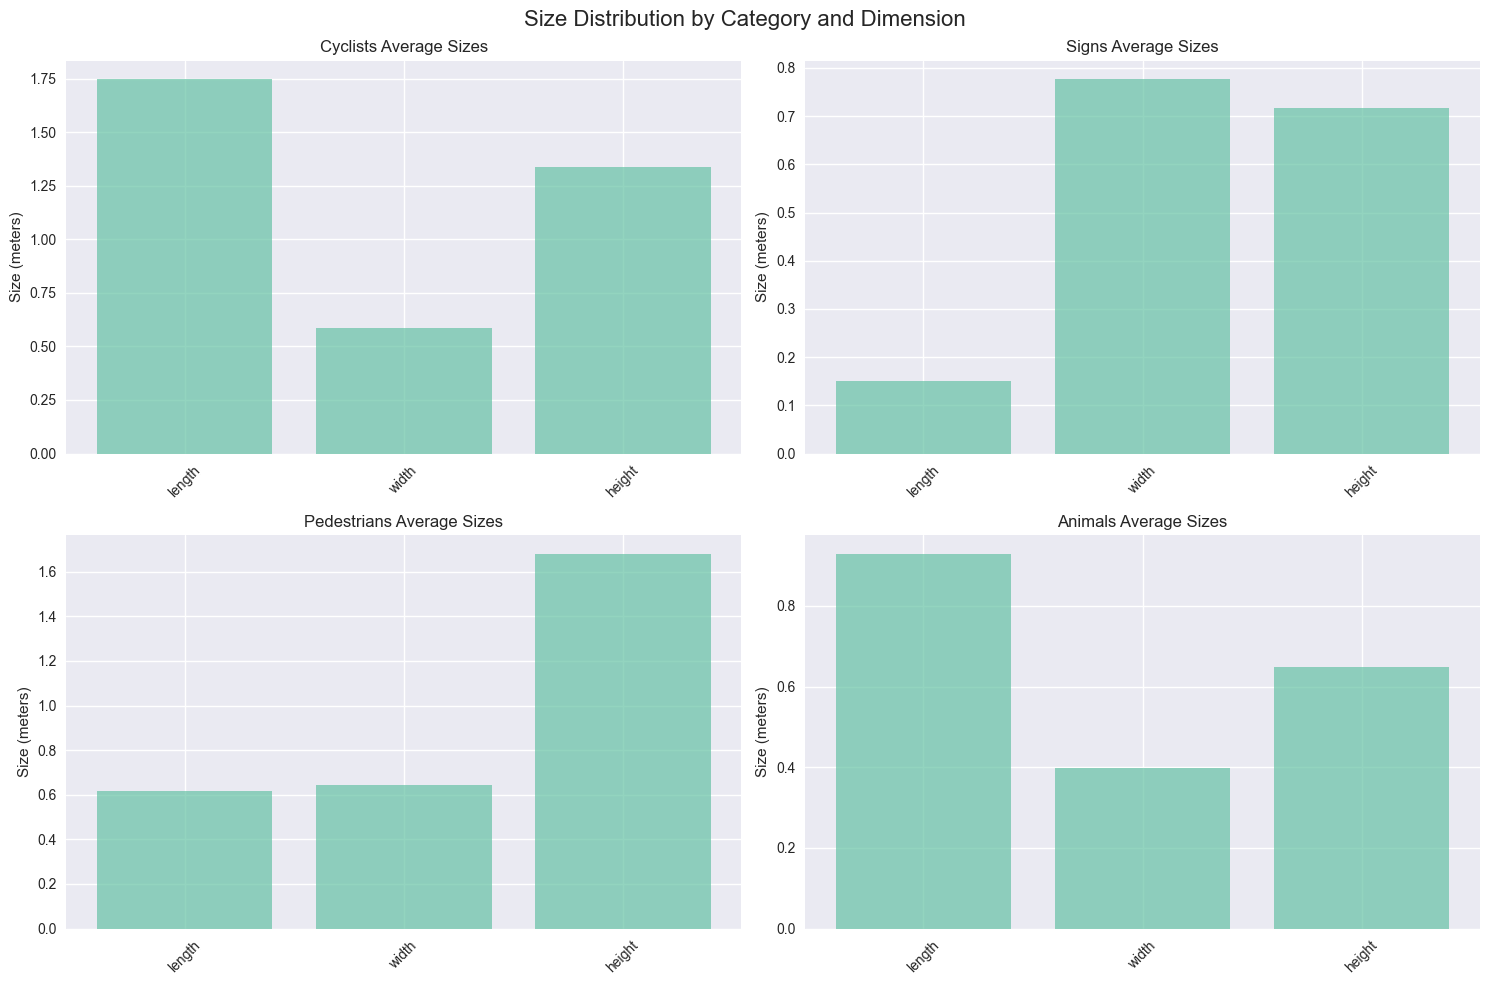

In [41]:
if class_data and 'focus_statistics' in class_data:
    # Size comparison for focus categories
    size_data = []
    
    for category in ['cyclists', 'signs', 'pedestrians', 'animals']:
        if category in focus_stats:
            size_stats = focus_stats[category]['size_statistics']
            for dimension in ['length', 'width', 'height']:
                if size_stats[dimension]['count'] > 0:
                    size_data.append({
                        'Category': category.title(),
                        'Dimension': dimension.title(),
                        'Mean': size_stats[dimension]['mean'],
                        'Median': size_stats[dimension]['median'],
                        'Min': size_stats[dimension]['min'],
                        'Max': size_stats[dimension]['max']
                    })
    
    size_df = pd.DataFrame(size_data)
    
    # Box plot comparison
    fig = px.box(
        size_df,
        x='Category',
        y='Mean',
        color='Dimension',
        title='Average 3D Size Comparison (Length, Width, Height)',
        labels={'Mean': 'Size (meters)', 'Category': 'Object Category'}
    )
    
    fig.show()
    
    # Size statistics table
    print("=== 3D SIZE STATISTICS FOR FOCUS CATEGORIES ===")
    print(f"{'Category':<12} {'Dimension':<10} {'Mean':<8} {'Median':<8} {'Min':<8} {'Max':<8}")
    print("-" * 70)
    
    for category in ['cyclists', 'signs', 'pedestrians', 'animals']:
        if category in focus_stats:
            size_stats = focus_stats[category]['size_statistics']
            print(f"\n{category.upper()}:")
            for dimension in ['length', 'width', 'height']:
                if size_stats[dimension]['count'] > 0:
                    stats = size_stats[dimension]
                    print(f"  {dimension:10} {stats['mean']:8.2f} {stats['median']:8.2f} "
                          f"{stats['min']:8.2f} {stats['max']:8.2f}")
    
    # Create detailed size distribution plots
    fig2, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig2.suptitle('Size Distribution by Category and Dimension', fontsize=16)
    
    categories_plot = ['cyclists', 'signs', 'pedestrians', 'animals']
    axes_flat = axes.flatten()
    
    for i, category in enumerate(categories_plot):
        if category in focus_stats and i < 4:
            size_stats = focus_stats[category]['size_statistics']
            dimensions = ['length', 'width', 'height']
            means = [size_stats[dim]['mean'] for dim in dimensions if size_stats[dim]['count'] > 0]
            dim_names = [dim for dim in dimensions if size_stats[dim]['count'] > 0]
            
            if means:
                axes_flat[i].bar(dim_names, means, alpha=0.7)
                axes_flat[i].set_title(f'{category.title()} Average Sizes')
                axes_flat[i].set_ylabel('Size (meters)')
                axes_flat[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 7. Relative Position Analysis

In [46]:
if class_data and 'focus_statistics' in class_data:
    # Analyze relative positions for vulnerable road users (cyclists, pedestrians, animals)
    vulnerable_categories = ['cyclists', 'pedestrians', 'animals']
    
    # Create stacked bar chart for positions
    position_data = []
    
    for category in vulnerable_categories:
        if category in focus_stats:
            positions = focus_stats[category]['by_relative_position']
            total_cat = sum(positions.values())
            
            for position, count in positions.items():
                if position != 'unknown':  # Filter out unknown positions
                    percentage = count / total_cat * 100 if total_cat > 0 else 0
                    position_data.append({
                        'Category': category.title(),
                        'Position': position,
                        'Count': count,
                        'Percentage': percentage
                    })
    
    position_df = pd.DataFrame(position_data)
    
    if not position_df.empty:
        # Create stacked bar chart
        fig = px.bar(
            position_df,
            x='Category',
            y='Count',
            color='Position',
            title='Relative Position Distribution for Vulnerable Road Users',
            labels={'Count': 'Number of Objects', 'Category': 'Object Category'}
        )
        
        fig.show()
        
        # Safety analysis - objects in ego lane
        print("=== SAFETY ANALYSIS: OBJECTS IN DRIVING PATH ===")
        ego_lane_positions = ['EgoLane', 'LeftAndEgoLane', 'RightAndEgoLane']
        
        for category in vulnerable_categories:
            if category in focus_stats:
                positions = focus_stats[category]['by_relative_position']
                total_cat = sum(positions.values())
                ego_count = sum(positions.get(pos, 0) for pos in ego_lane_positions)
                
                percentage = ego_count / total_cat * 100 if total_cat > 0 else 0
                print(f"{category.title():12}: {ego_count:6,} in ego lane ({percentage:5.1f}% of all {category})")
        
        # Detailed position breakdown
        print("\n=== DETAILED POSITION ANALYSIS ===")
        for category in vulnerable_categories:
            if category in focus_stats:
                print(f"\n{category.upper()} POSITIONS:")
                positions = focus_stats[category]['by_relative_position']
                total_cat = sum(positions.values())
                
                # Sort by count and show top 5
                sorted_positions = sorted(positions.items(), key=lambda x: x[1], reverse=True)[:5]
                for position, count in sorted_positions:
                    percentage = count / total_cat * 100 if total_cat > 0 else 0
                    print(f"  {position:20}: {count:6,} ({percentage:5.1f}%)")
    
    # Create pie chart for NotOnEgoRoad vs On Road
    safety_summary = {'Off Road': 0, 'On Road': 0}
    
    for category in vulnerable_categories:
        if category in focus_stats:
            positions = focus_stats[category]['by_relative_position']
            
            off_road = positions.get('NotOnEgoRoad', 0)
            on_road = sum(count for pos, count in positions.items() 
                         if pos not in ['NotOnEgoRoad', 'unknown', 'Inconclusive'])
            
            safety_summary['Off Road'] += off_road
            safety_summary['On Road'] += on_road
    
    fig2 = px.pie(
        values=list(safety_summary.values()),
        names=list(safety_summary.keys()),
        title='Vulnerable Road Users: On-Road vs Off-Road Distribution'
    )
    fig2.show()

=== SAFETY ANALYSIS: OBJECTS IN DRIVING PATH ===
Cyclists    :  2,315 in ego lane (  1.9% of all cyclists)
Pedestrians :  2,185 in ego lane (  0.6% of all pedestrians)
Animals     :     48 in ego lane (  1.4% of all animals)

=== DETAILED POSITION ANALYSIS ===

CYCLISTS POSITIONS:
  NotOnEgoRoad        : 109,772 ( 88.4%)
  Inconclusive        :  4,042 (  3.3%)
  RightLane           :  3,312 (  2.7%)
  EgoLane             :  2,236 (  1.8%)
  LeftLaneOncoming    :  1,590 (  1.3%)

PEDESTRIANS POSITIONS:
  NotOnEgoRoad        : 302,459 ( 84.2%)
  unknown             : 40,595 ( 11.3%)
  Inconclusive        :  8,922 (  2.5%)
  EgoLane             :  2,058 (  0.6%)
  RightLane           :  1,619 (  0.5%)

ANIMALS POSITIONS:
  NotOnEgoRoad        :  2,816 ( 81.9%)
  unknown             :    401 ( 11.7%)
  Inconclusive        :    110 (  3.2%)
  EgoLane             :     45 (  1.3%)
  LeftLane            :     20 (  0.6%)


## 9. Enhanced Analysis: Traffic Density Patterns

Analysis of traffic density and scene complexity patterns in the dataset.

In [50]:
if class_data and 'detailed_statistics' in class_data:
    traffic_density = class_data['detailed_statistics'].get('traffic_density_analysis', {})
    
    if traffic_density:
        print("=== TRAFFIC DENSITY ANALYSIS ===")
        
        # Density categories
        density_categories = {
            'Low Density (<5 objects)': traffic_density.get('low_density_frames', 0),
            'Medium Density (5-15 objects)': traffic_density.get('medium_density_frames', 0),
            'High Density (>15 objects)': traffic_density.get('high_density_frames', 0)
        }
        
        # Create pie chart for density distribution
        fig = px.pie(
            values=list(density_categories.values()),
            names=list(density_categories.keys()),
            title='Traffic Density Distribution in Dataset',
            color_discrete_sequence=['lightgreen', 'orange', 'red']
        )
        fig.show()
        
        # Detailed analysis
        total_frames = sum(density_categories.values())
        print(f"\n📊 TRAFFIC DENSITY BREAKDOWN:")
        for category, count in density_categories.items():
            percentage = count / total_frames * 100 if total_frames > 0 else 0
            print(f"   {category}: {count:,} frames ({percentage:.1f}%)")
        
        # Objects per frame distribution
        obj_distribution = traffic_density.get('objects_per_frame_distribution', {})
        if obj_distribution:
            # Convert to sorted list for visualization
            dist_data = [(int(k), v) for k, v in obj_distribution.items() if str(k).isdigit()]
            dist_data.sort()
            
            if len(dist_data) > 0:
                obj_counts, frame_counts = zip(*dist_data)
                
                # Create histogram
                fig2 = px.bar(
                    x=obj_counts,
                    y=frame_counts,
                    title='Distribution of Objects per Frame',
                    labels={'x': 'Number of Objects', 'y': 'Number of Frames'},
                    color=frame_counts,
                    color_continuous_scale='viridis'
                )
                fig2.update_layout(showlegend=False)
                fig2.show()
                
                # Statistical summary
                total_objects = sum(k * v for k, v in dist_data)
                mean_objects = total_objects / sum(v for _, v in dist_data)
                max_objects = max(obj_counts)
                min_objects = min(obj_counts)
                
                print(f"\n📈 OBJECTS PER FRAME STATISTICS:")
                print(f"   Average objects per frame: {mean_objects:.1f}")
                print(f"   Range: {min_objects} to {max_objects} objects")
                print(f"   Most complex scene: {max_objects} objects in a single frame")
        
        # Scene complexity analysis
        scene_complexity = class_data['detailed_statistics'].get('scene_complexity', {})
        if scene_complexity:
            complexity_data = {
                'Simple (<3 types)': scene_complexity.get('simple_scenes', 0),
                'Moderate (3-6 types)': scene_complexity.get('moderate_scenes', 0),
                'Complex (>6 types)': scene_complexity.get('complex_scenes', 0)
            }
            
            print(f"\n🧩 SCENE COMPLEXITY ANALYSIS:")
            total_complexity = sum(complexity_data.values())
            for complexity, count in complexity_data.items():
                percentage = count / total_complexity * 100 if total_complexity > 0 else 0
                print(f"   {complexity}: {count:,} scenes ({percentage:.1f}%)")
    
    else:
        print("❌ No traffic density analysis data available.")
else:
    print("❌ Class data not loaded or missing detailed statistics.")

=== TRAFFIC DENSITY ANALYSIS ===



📊 TRAFFIC DENSITY BREAKDOWN:
   Low Density (<5 objects): 1,131 frames (1.1%)
   Medium Density (5-15 objects): 7,610 frames (7.6%)
   High Density (>15 objects): 91,259 frames (91.3%)



📈 OBJECTS PER FRAME STATISTICS:
   Average objects per frame: 69.0
   Range: 1 to 472 objects
   Most complex scene: 472 objects in a single frame

🧩 SCENE COMPLEXITY ANALYSIS:
   Simple (<3 types): 100,000 scenes (100.0%)
   Moderate (3-6 types): 0 scenes (0.0%)
   Complex (>6 types): 0 scenes (0.0%)
